In [1]:
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 3.2 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
import keras
import tensorflow_addons as tfa
from keras import layers
from keras.models import load_model
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix
import seaborn as sn

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


**Load Data from Drive**

In [7]:
X_train = np.load('/content/drive/MyDrive/Bengisu/DL/data/DataForClassification_TimeDomain.npy')
X_train = np.transpose(X_train)
print(X_train.shape)

(936, 3600)


In [8]:
types={'healthy','missing','crack','spall','chip5a','chip4a','chip3a','chip2a','chip1a'}
types

{'chip1a',
 'chip2a',
 'chip3a',
 'chip4a',
 'chip5a',
 'crack',
 'healthy',
 'missing',
 'spall'}

In [9]:
Y_train = np.zeros((936,1))
label=0
print(label)
for i in range(936):

  Y_train[i]=label
  if (i%104==0) and (i!=0):
     label = label +1
     print(label)

0
1
2
3
4
5
6
7
8


In [10]:
Y_train[104:103*2]

array([[0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [11]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [12]:
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes = 9)
print(Y_train[101,:])

[1. 0. 0. 0. 0. 0. 0. 0. 0.]


**Plot Digits**

In [13]:
#Train-Test Split
X_dev, X_test, Y_dev, Y_test = train_test_split(X_train, Y_train, test_size=0.2, shuffle=True, random_state=0)

X_train, X_val, Y_train, Y_val = train_test_split(X_dev, Y_dev, test_size=0.2, shuffle=True, random_state=0)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(598, 3600)
(150, 3600)
(188, 3600)


In [14]:
X_train = np.expand_dims(X_train, axis=1)
X_val = np.expand_dims(X_val, axis=1)
X_test = np.expand_dims(X_test, axis=1)
Y_train = np.expand_dims(Y_train, axis=1)
Y_val = np.expand_dims(Y_val, axis=1)
Y_test = np.expand_dims(Y_test, axis=1)

In [15]:
model = Sequential()
model.add(layers.GRU(32, input_shape=(1, 3600 ), return_sequences=True))
model.add(layers.Dense(8))
model.add(Dense(9, activation='softmax'))

In [16]:
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 1, 32)             348864    
                                                                 
 dense (Dense)               (None, 1, 8)              264       
                                                                 
 dense_1 (Dense)             (None, 1, 9)              81        
                                                                 
Total params: 349209 (1.33 MB)
Trainable params: 349209 (1.33 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
adam = Adam(lr=1e-3)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)

In [18]:
# Set a learning rate annealer
model_name_save= '/content/hw5_model.hdf5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(model_name_save, save_freq='epoch', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stop = tf.keras.callbacks.EarlyStopping(  monitor='val_accuracy', patience=12, verbose=1,  mode='max',restore_best_weights=False)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(  monitor='val_accuracy', factor=0.3, patience=7,  min_lr=1e-5, verbose=1,  mode='max')


In [19]:
X_train.shape

(598, 1, 3600)

In [20]:
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50, batch_size=64)

Epoch 1/50
10/10 [==============================] - 3s 78ms/step - loss: 1.9679 - accuracy: 0.5067 - val_loss: 1.6842 - val_accuracy: 0.6333
Epoch 2/50
10/10 [==============================] - 0s 13ms/step - loss: 1.4483 - accuracy: 0.7910 - val_loss: 1.3354 - val_accuracy: 0.7400
Epoch 3/50
10/10 [==============================] - 0s 12ms/step - loss: 1.0820 - accuracy: 0.8495 - val_loss: 1.0647 - val_accuracy: 0.7800
Epoch 4/50
10/10 [==============================] - 0s 13ms/step - loss: 0.8173 - accuracy: 0.8896 - val_loss: 0.8652 - val_accuracy: 0.8467
Epoch 5/50
10/10 [==============================] - 0s 12ms/step - loss: 0.6240 - accuracy: 0.9398 - val_loss: 0.7110 - val_accuracy: 0.8933
Epoch 6/50
10/10 [==============================] - 0s 14ms/step - loss: 0.4815 - accuracy: 0.9682 - val_loss: 0.5932 - val_accuracy: 0.9200
Epoch 7/50
10/10 [==============================] - 0s 14ms/step - loss: 0.3757 - accuracy: 0.9766 - val_loss: 0.5072 - val_accuracy: 0.9333
Epoch 8/50
10

**Predict Test Data**

In [21]:
pred = model.predict(X_test, batch_size=1)
pred = pred.flatten()
print(pred.round(2))
Y_pred = np.where(pred > 0.05, 1, 0)
print(Y_pred)

188/188 [==============================] - 1s 2ms/step
[0.   0.   0.   ... 0.17 0.03 0.14]
[0 0 0 ... 1 0 1]


In [22]:
model.save("model.h5")
new_model = tf.keras.models.load_model('model.h5')
model.summary()
score = model.evaluate(X_test, Y_test, batch_size=16)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 1, 32)             348864    
                                                                 
 dense (Dense)               (None, 1, 8)              264       
                                                                 
 dense_1 (Dense)             (None, 1, 9)              81        
                                                                 
Total params: 349209 (1.33 MB)
Trainable params: 349209 (1.33 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
12/12 [==============================] - 0s 14ms/step - loss: 0.1556 - accuracy: 0.9574
accuracy: 95.74%


(188, 1, 9)
(1692,)
(1692,)
accuracy score:0.9710401891252955
confusion matrix:
 [[1457   47]
 [   2  186]]


<Axes: >

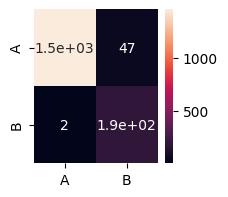

In [23]:
print(Y_test.shape)
Y_true = Y_test.reshape(1692)
print(Y_true.shape)
print(Y_pred.shape)

print('accuracy score:' + str(accuracy_score(Y_true, Y_pred)))

A=confusion_matrix(Y_true, Y_pred)
print('confusion matrix:\n' ,A)

df_cm = pd.DataFrame(A, index = [i for i in "AB"], columns = [i for i in "AB"])
plt.figure(figsize = (2,2))
sn.heatmap(df_cm, annot=True)